TypeError: 'float' object cannot be interpreted as an integer

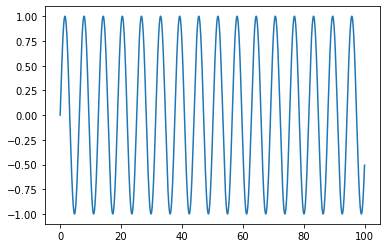

In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(t):
    return math.cos(t)

DELTA_T = 0.001
MAX_T = 100.0

t = 0.0 # t初期値
x = 0.0 # t=0でのx

x_hist = [x]
t_hist = [t]

# 逐次計算
while t < MAX_T:
    x += f(t)*DELTA_T
    t += DELTA_T
    x_hist.append(x)
    t_hist.append(t)

# 数値解のプロット  
plt.plot(t_hist, x_hist)

# 厳密解(sin(t))のプロット
t = np.linspace(0, MAX_T, 1/DELTA_T)
x = np.sin(t)
plt.plot(t, x)

plt.xlim(0, MAX_T)
plt.ylim(-1.3, 1.3)

plt.show()

In [7]:
import numpy as np
from math import sin
from scipy.integrate import odeint

''' constants '''
m = 1 # mass of the pendulum [kg]
l = 1 # length of the pendulum [m]
g = 10 # Gravitational acceleration [m/s^2]

''' time setting '''
t_end = 10 # simulation time [s]
t_fps = 50 # frame per second. This value means smoothness of produced graph and animation
t_step = 1/t_fps 
t = np.arange(0, t_end, t_step) 

''' initial value '''
theta_init = 0 # initial value of theta [rad]
dtheta_init = 1 # initial value of dot theta [rad/s]
s_init = np.r_[theta_init, dtheta_init]

s = odeint(odefunc, s_init, t)
print('ODE calculation finished.')

ODE calculation finished.


In [6]:
def odefunc(s, t):
    theta = s[0]
    dtheta = s[1]
    ddtheta = -g/l*sin(theta) # <- Equation of motion
    return np.r_[dtheta, ddtheta]

In [9]:
print(np.c_[t, s])

[[ 0.          0.          1.        ]
 [ 0.02        0.01998668  0.99800074]
 [ 0.04        0.03989343  0.99201173]
 ...
 [ 9.94       -0.05725082  0.98347963]
 [ 9.96       -0.03747992  0.99295215]
 [ 9.98       -0.01755919  0.9984571 ]]


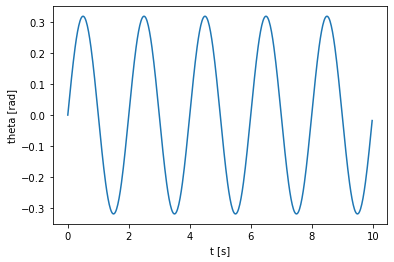

In [8]:
plt.figure()
plt.plot(t, s[:, 0])
plt.xlabel('t [s]')
plt.ylabel('theta [rad]')
plt.savefig('pendulum_graph.png')